# Euclidean vs. Cosine Similarity

## When to use which distance metric? 

This notebook compares two different measures of distance in a vector space and why either has its function under different circumstances. 

Starting off with quite a straight-forward example... 
* we have our vector space X, that contains instances with animals. 
* They are measured by their length, and weight. 
* They have also been labelled by their stage of aging (young = 0, mid = 1, adult = 2). 

Source: https://cmry.github.io/notes/euclidean-v-cosine

<AxesSubplot:xlabel='weight', ylabel='length'>

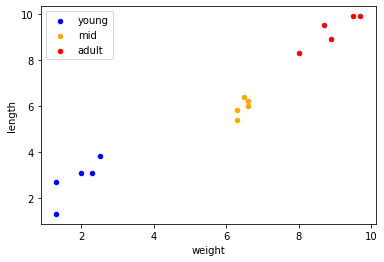

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline

# Dataset we are working with.
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

# Turn numpy array into dataframe
df = pd.DataFrame(X, columns=['weight', 'length', 'label'])

# Plot the data on a scatter plot
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

Looking at the Scatter Plot: 

* the three classes are pretty well distinguishable by these two features that we have. 
* Say that we apply k-NN to our data that will learn to classify new instances based on their distance to our known instances (and their labels). 
* The algorithm needs a distance metric to determine which of the known instances are closest to the new one. 
* Let’s try to choose between either euclidean or cosine for this example.


## Euclidean Distance

Our euclidean distance function can be defined as follows:

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/33c51af836e0c5bcbdf9fb2ab0e1a383c55e3ce9)

In [11]:
# in code
def euclideanDistance(q, p):
    return np.sqrt(np.sum((q - p)**2))

In [15]:
# Some examples from the dataset

x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]

print("Examples Vectors: \n", "x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14, "\n")

# Euclidean Distance examples
print("Euclidean Distance:" , "\n",
      "x14 and x0:", euclideanDistance(x14, x0), "\n",
      "x14 and x1:", euclideanDistance(x14, x1), "\n",
      "x14 and x4:", euclideanDistance(x14, x4))



Examples Vectors: 
 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3] 

Euclidean Distance: 
 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


According to euclidean distance, instance #14 is closest to #4. 

Our 4th instance had the label: 0 = young, which is what we would visually also deem the correct label for this instance.

Scatter Plot to compare: 



<AxesSubplot:xlabel='weight', ylabel='length'>

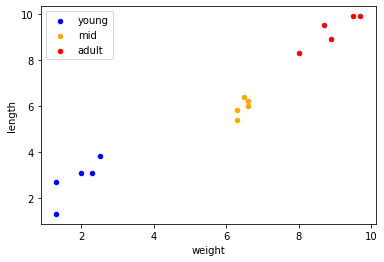

In [18]:
# Compare on Scatter Plot
print("Scatter Plot to compare: \n")
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

Now let’s see what happens when we use Cosine similarity.

## Cosine Similarity 

Our cosine similarity function can be defined as follows:
Where a and b are two vectors. 

![cosine](https://wikimedia.org/api/rest_v1/media/math/render/svg/350bc79a3e277bbe96b2d1bc081a599dbc898c35)




In [20]:
def cosineSimilarity(a, b):
    return np.divide(np.dot(a, b), (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b))))

In [26]:
# Let’s see these calculations for all our vectors:

print(" x14 and x0:", cosineSimilarity(x14, x0), "\n",
      "x14 and x1:", cosineSimilarity(x14, x1), "\n",
      "x14 and x4:", cosineSimilarity(x14, x4), "\n")

print("According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label:", "\n", 
    X[1], "-> label: 2 = adult, which is definitely NOT what we would deem the correct label!")

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174 

According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label: 
 [9.7 9.9 2. ] -> label: 2 = adult, which is definitely NOT what we would deem the correct label!


According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label: [9.7 9.9 2. ] 2 = adult, which is definitely NOT what we would deem the correct label!


# References

* 
* https://cmry.github.io/notes/euclidean-v-cosine
* https://paulrohan.medium.com/euclidean-distance-and-normalization-of-a-vector-76f7a97abd9 
